Import Modules

In [2]:
import torch
import torch.nn as nn # Pytorch neural network modules
import torch.nn.functional as F # activation functions 
from torch.optim import SGD # Stochastic gradient descent

import numpy as np
# Plotting
import matplotlib.pyplot as plt


Forward Pass Through the NN to Calculate and Return Output Value

Question: Why are we defining the weights of what comes after the initial 'neurons' in the network? Shouldn't the model learn the value based on features?

In [11]:
# Inherits from Pytorch class module
class BasicNN(nn.Module):
    @torch.no_grad()
    def __init__(self):
        

        # Inherits from parent class
        super().__init__()

        # create neural network parameters (weights & biases)
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)

        # Requires gradient defaults to true
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad = False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)

        # the final bias before it enters relu for prediction
        self.final_bias = nn.Parameter(torch.tensor(16.0), requires_grad=False)

    # Make forward pass
    def forward(self,input):
        # connect input to activation function
        # Equal to w*x + b
        inputToReluZero = input * self.w00 + self.b00
        # Pass in this to relu
        reluZeroOutput = F.relu(inputToReluZero) 
        scaledReluZeroOutput = reluZeroOutput * self.w01

        inputToReluOne = input * self.w10 + self.b10
        reluOneOutput = F.relu(inputToReluOne)
        scaledReluOneOutput = reluOneOutput * self.w11

        # add top and bottom scaled values of NN to input as final relu, along w/bias
        inputForFinalRelu = scaledReluOneOutput + scaledReluZeroOutput + self.final_bias

        output = F.relu(inputForFinalRelu)

        return output



In [12]:
# sequence of values between 0 and 1 inclusive
input = torch.linspace(start = 0, end = 1, steps = 11)

print(input)

model = BasicNN()
# automatically calls forward function when init the model with data
outputVals = model(input)
print(outputVals)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
tensor([16.0000, 19.4020, 22.8040, 26.2060, 29.6080, 33.0100, 29.4760, 25.9420,
        22.4080, 18.8740, 15.3400])


Begin Seaborn

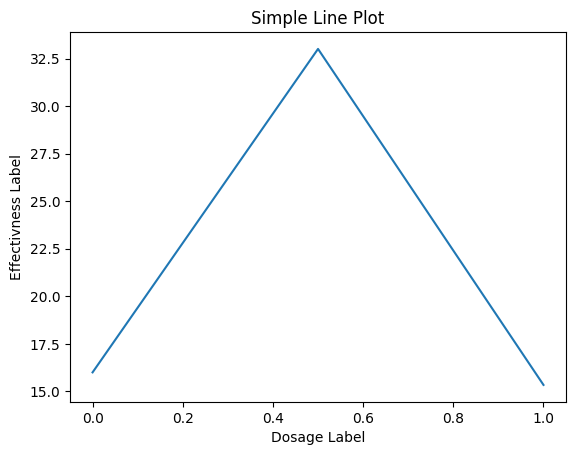

In [13]:


# Data for the plot


# Create the plot
plt.plot(input, outputVals)

# Add labels and a title for clarity
plt.xlabel("Dosage Label")
plt.ylabel("Effectivness Label")
plt.title("Simple Line Plot")

# Display the plot
plt.show()

Now let's try and train sumn

In [23]:
# Inherits from Pytorch class module
class BasicNN_train(nn.Module):
    @torch.no_grad()
    def __init__(self):
        

        # Inherits from parent class
        super().__init__()

        # create neural network parameters (weights & biases)
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)

        # Requires gradient defaults to true
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad = False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)

        # the final bias before it enters relu for prediction
        # setting to true means we wanna optimize the param. Will require gradient for derivs
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

    # Make forward pass
    def forward(self,input):
        # connect input to activation function
        # Equal to w*x + b
        inputToReluZero = input * self.w00 + self.b00
        # Pass in this to relu
        reluZeroOutput = F.relu(inputToReluZero) 
        scaledReluZeroOutput = reluZeroOutput * self.w01

        inputToReluOne = input * self.w10 + self.b10
        reluOneOutput = F.relu(inputToReluOne)
        scaledReluOneOutput = reluOneOutput * self.w11

        # add top and bottom scaled values of NN to input as final relu, along w/bias
        inputForFinalRelu = scaledReluOneOutput + scaledReluZeroOutput + self.final_bias

        output = F.relu(inputForFinalRelu)

        return output



tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
tensor([16.0000, 19.4020, 22.8040, 26.2060, 29.6080, 33.0100, 29.4760, 25.9420,
        22.4080, 18.8740, 15.3400])


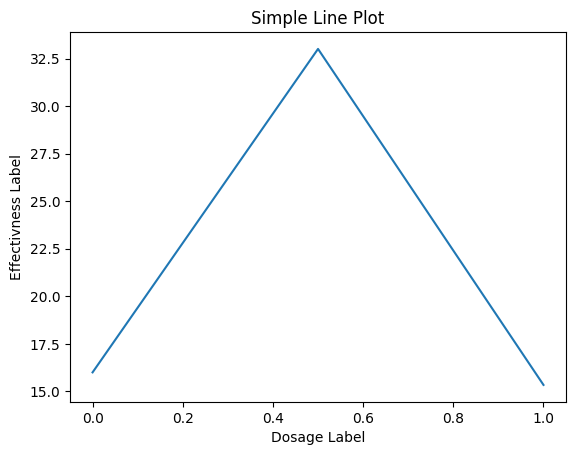

In [24]:
input = torch.linspace(start = 0, end = 1, steps = 11)

print(input)

model = BasicNN()
# automatically calls forward function when init the model with data
outputVals = model(input)
print(outputVals)



# Data for the plot


# Create the plot
plt.plot(input, outputVals.detach())

# Add labels and a title for clarity
plt.xlabel("Dosage Label")
plt.ylabel("Effectivness Label")
plt.title("Simple Line Plot")

# Display the plot
plt.show()

train to optimize b_final

In [25]:
trainingData = torch.tensor([0., 0.5, 1.])
label = torch.tensor([0., 1., 0.])

use the training data

In [29]:
# learning rate  = 0.1
# does SGD on each param where we set requires grad to true
newModel = BasicNN_train()
optimizer = SGD(newModel.parameters(), lr=0.1)

# converts tensor value to string
print("Final bias but before optimization: "+ str(newModel.final_bias.data))

# run each trainign point thru the model 100 times
for epoch in range(100):
    # reset total loss on each iteration
    total_loss = 0
    for iteration in range(len(trainingData)):
        inputI = trainingData[iteration]
        labelI = label[iteration]

        # wow! we run the whole model on each piece of training data! 
        # Think about how expensive that is considering each iteration we're also doing things like backprop
        outputI = newModel(inputI)

        loss = (outputI - labelI)**2

        # backprop, probably takes derivative w/respect to parameters we said we wanna optimize
        # remembers derivative we calulcated for 1st training example, adds to 2nd training example
        loss.backward()

        total_loss += float(loss)
    
    if (total_loss < 0.0001):
        print("Num steps: "+ str(epoch))
        break
    
    # take the step towards better val b_final
    optimizer.step()
    # zero out derivs bcz we don't want derivs from previous epoch
    optimizer.zero_grad()

    print("Step: " + str(epoch) + " Total Loss " + str(total_loss))






Final bias but before optimization: tensor(0.)
Step: 0 Total Loss 256.3200988769531
Step: 1 Total Loss 164.0448760986328
Step: 2 Total Loss 104.98870849609375
Step: 3 Total Loss 67.1927719116211
Step: 4 Total Loss 43.00336837768555
Step: 5 Total Loss 27.522159576416016
Step: 6 Total Loss 17.614181518554688
Step: 7 Total Loss 11.273076057434082
Step: 8 Total Loss 7.21476936340332
Step: 9 Total Loss 4.6174516677856445
Step: 10 Total Loss 2.9551703929901123
Step: 11 Total Loss 1.8913096189498901
Step: 12 Total Loss 1.210437297821045
Step: 13 Total Loss 0.7746805548667908
Step: 14 Total Loss 0.49579527974128723
Step: 15 Total Loss 0.3173092007637024
Step: 16 Total Loss 0.20307788252830505
Step: 17 Total Loss 0.12997011840343475
Step: 18 Total Loss 0.0831809863448143
Step: 19 Total Loss 0.053235918283462524
Step: 20 Total Loss 0.03407112881541252
Step: 21 Total Loss 0.021805522963404655
Step: 22 Total Loss 0.013955534435808659
Step: 23 Total Loss 0.008931614458560944
Step: 24 Total Loss 0.0